# Исследование алгоритма k-means

## Задача алгоритма:

Разделить объекты на кластеры (для сжатия и упрощения данных): 
    - Объекты в одном кластере похожи друг на друга;
    - Объекты в разных кластерах существенно отличаются.

## 5 основных шагов алгоритма k-means:
1. Выбраем количество кластеров k, которое нам кажется оптимальным для наших данных;
2. Раскидываем случайным образом в пространство наших данных k точек (центроидов);
3. Для каждой точки нашего набора данных считаем, к какому центроиду она ближе;
4. Перемещаем каждый центроид в центр выборки, которую мы отнесли к этому центроиду;
5. Повторяем последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся".

## Реализация k-means:

In [1]:
%matplotlib inline
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import random
import copy
import KmeansFunctions as km

Применим алгоритм k-средних на наших данных, разбив их на два кластера:

In [2]:
data = []
with open("km.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data = np.array(data)

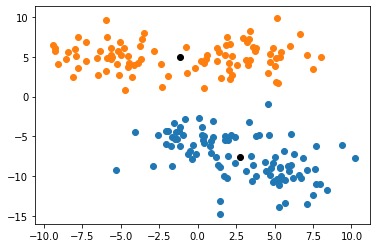

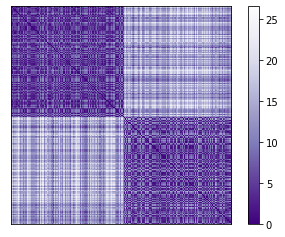

In [3]:
K = 2
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

km.take_plot(centroids, cluster_assignments, data)
km.distance_table(cluster_assignments = cluster_assignments, data = data, centroids = centroids)

Как видно из графика, такая стратегия инициализации работает достаточно хорошо. Попробуем увеличить число кластеров.

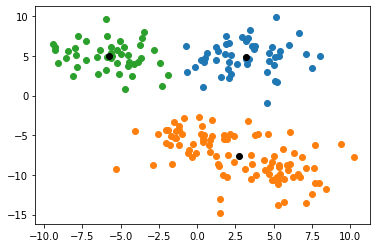

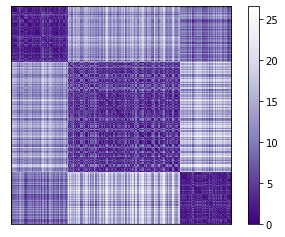

In [4]:
K = 3
k_means_result =  km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

km.take_plot(centroids, cluster_assignments, data)
km.distance_table(cluster_assignments = cluster_assignments, data = data, centroids = centroids)

При такой начальной инициализации результат также выглядит достаточно правдоподобным. С другой стороны, возможна также такая ситуация:

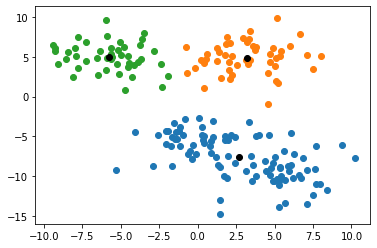

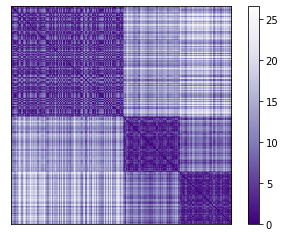

In [5]:
K = 3
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

km.take_plot(centroids, cluster_assignments, data)
km.distance_table(cluster_assignments = cluster_assignments, data = data, centroids = centroids)

Получается, случайная инициализация центров кластеров недостаточно надежна. Попробуем подобрать алгоритм, работающий стабильнее.

## Различные подходы к начальной инициализации:

В отличие от первого подхода, можно сначала случайным образом задать для каждой точки кластер, к которому она относится, а потом найти центры кластеров как покомпонентное среднее всех точек, относящихся к кластеру. Однако данный подход также не показывает удовлетворительных результатов.

In [6]:
K = 3
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

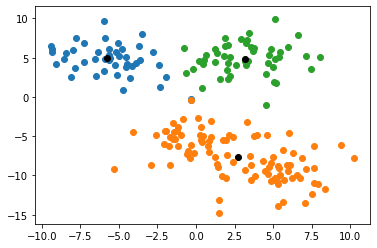

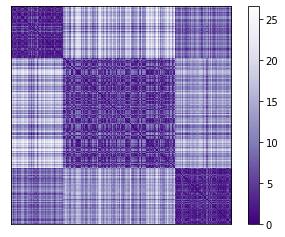

In [7]:
test_centroids = []
for j in range(K):
    test_centroid = random.choice(data)
    idx = np.where(data == test_centroid)
    test_data = np.delete(data, idx)
    test_counter = 0
    test_centroid -= test_centroid
    for i, line in enumerate(test_data):
        test_centroid += line
        test_counter += 1
    test_centroid /= (test_counter*1.0)
    test_centroids.append(test_centroid)
    
test_centroids = np.array(test_centroids)

centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

km.take_plot(centroids = centroids, cluster_assignments = cluster_assignments, data = data)
km.distance_table(cluster_assignments = cluster_assignments, data = data, centroids = centroids)

Возможен еще один способ: выбирать для начальной инициализации достаточно далекие точки. Однако это не решит проблемы, ведь точки в одном кластере могут быть как далекими, так и близкими относительно других кластеров. Плюс при увеличении числа векторов значительно вырастает сложность алгоритма.

В результате приходим к выводу, что случайная инициализация выглядит самой разумной и подходящей. В идеале, каждый раз необходимо проводить исследование объекта, к которому применяется k-means. В таком случае можно добиться более высокой точности.

## Для каких задач подходит k-means?

Данный алгоритм обладает сравнительно высокой эффективностью при достаточной простоте реализации. Однако, как мы уже заметили выше, он крайне чувствителен к начальной инициализации, а так же к случайным выбросам и шумам. K-means старается минимизировать среднеквадратичное отклонение на точках каждого кластера, используя евклидову метрику. Думаю, при использовании других метрик результат может поменяться. K-means формирует кластеры центрически. Из этого можно понять к каким задачам он лучше подходит.

Во время проведения исследования мне встретилась статья, в которой говорилось, что k-means часто используется при кластеризации изобржений и видео ввиду его простоты и быстрой скорости работы. Перед его применением, однако, необходимо очистить изобрадения от шума, пропустив их через определенные фильтры.

Существуют наборы данных, на которых он неприменим. Рассмотрим, например, такой вариант:

In [8]:
data = []
with open("data.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data = np.array(data)

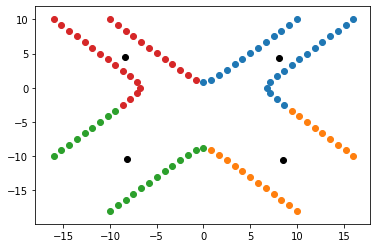

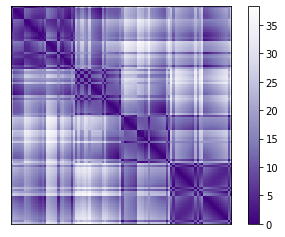

In [9]:
K = 4
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

km.take_plot(centroids, cluster_assignments, data)
km.distance_table(cluster_assignments = cluster_assignments, data = data, centroids = centroids)

Как мы видим из графика, подобное разбиение на кластеры соверщенно не соответствует действительности. 

Приведу еще один пример:

In [10]:
data = []
with open("data2.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data = np.array(data)

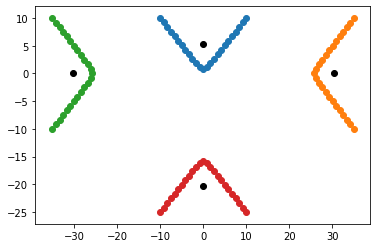

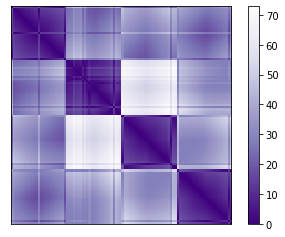

In [11]:
K = 4
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

km.take_plot(centroids, cluster_assignments, data)
km.distance_table(cluster_assignments = cluster_assignments, data = data, centroids = centroids)

А здесь алгоритм уже сработал верно. Получается, правильность его работы предсказать достаточно сложно. К тому же, в этих примерах нам было заранее известно число кластеров, на которые необходимо разбить данные, и потому качество кластеризации все-таки достаточно высоко. А как же следует действовать в том случае, когда число кластеров заранее неизвестно? Попробуем предложить алгоритм автоматического выбора числа кластеров.

## Стратегия выбора числа кластеров.

Наиболее удачным вариантом применения алгоритма k-means является ситуация, при которой нам заранее известно число кластеров, либо их количество можно рассчитать на основе анализа объекта, к которому применяется кластеризация. Например, если необходимо "распределить" игроков, забивших голы во время последнего матча, мы можем предположить, что количество образованных в результате кластеров будет равно трем, так как им будут соответсвовать следующие позиции игроков на поле — защитники, центральные защитники и нападающие. Такой подход вполне может быть применим в спортивной аналитике.

Однако чаще всего приходится сталкиваться с более общими задачами. В этом случае сделать такое очевидное предположение о наборе выходных данных невозможно. Рассмотрим второй способ. 

In [70]:
data = []
with open("kmeans.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data = np.array(data)

In [71]:
def auto_KMeans(data, K):
    minimal_claster_dist = (int(K * (K - 1) / 9)) + K
    distance = (data[:, 0][:, np.newaxis] - data[:, 0]) ** 2
    distance += (data[:, 1][:, np.newaxis] - data[:, 1]) ** 2
    distance = np.sqrt(distance)
    minimal_claster_dist = np.sort(distance.ravel())[minimal_claster_dist]
    minimal_claster_dist *= 0.72
    distance[distance <= minimal_claster_dist] = 0
    dist_copy = np.zeros(K * K).reshape(K, K)
    while True:
        for i in range(K):
            zero_dist = distance[distance [i, :] == 0]
            zero_dist = np.min(zero_dist, axis=0)
            dist_copy[i, :] = zero_dist
        if np.array_equal(dist_copy, distance):
            break
        distance = dist_copy.copy()
    distance[distance != 0] = 1
    return len(np.sum(np.unique(distance, axis=0), axis=1))

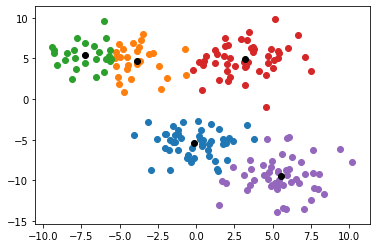

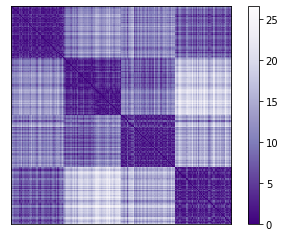

In [74]:
n_data=200
K = km.auto_KMeans(data, n_data)
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

km.take_plot(centroids, cluster_assignments, data)
km.distance_table(cluster_assignments = cluster_assignments, data = data, centroids = centroids)

## Визуализация матрицы попарных расстояний

В данном алгоритме будем опираться на уже существующий алгоритм нахождения покомпонентного среднего всех точек, относящихся к кластеру:

In [43]:
data = []
with open("km.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data = np.array(data)

In [44]:
K = 3
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

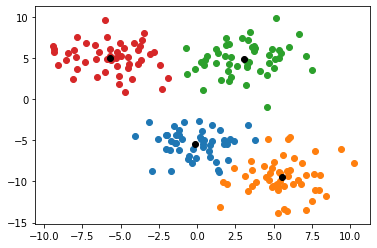

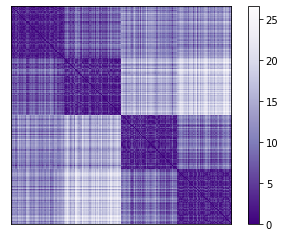

In [77]:
K = 4
centroids, cluster_assignments = km.algorithm(data, K)

n_data=200
K = km.auto_KMeans(data, n_data)
data = np.array(data)
centroids, cluster_assignments = km.cort_cores(centroids, cluster_assignments, data, 10)

    
km.take_plot(centroids, cluster_assignments=cluster_assignments, data=data)
km.distance_table(cluster_assignments = cluster_assignments, data = data, centroids=centroids)

## Сложность алгоритма:
Сложность стандатного алгоритма $O(l^{nk+1})$, где $n$ – размерность пространств, $k$ – количество кластеров и $l$ – количество объектов. Попробуем проследить изменение времени работы алгоритма от количества векторов:

In [18]:
import time

data = []
i = 0;
with open("data3.txt") as f:
    for line in f:
        i += 1
        data.append([float(x) for x in line.split()])
        if i == 100:
            break
data = np.array(data)

In [19]:
start_time = time.time()

K = 4
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

print("%s seconds" % (time.time() - start_time))

0.029774904251098633 seconds


In [20]:
data = []
i = 0;
with open("data3.txt") as f:
    for line in f:
        i += 1
        data.append([float(x) for x in line.split()])
        if i == 1000:
            break
data = np.array(data)

In [21]:
start_time = time.time()

K = 4
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

print("%s seconds" % (time.time() - start_time))

0.1836543083190918 seconds


In [22]:
data = []
i = 0;
with open("data3.txt") as f:
    for line in f:
        i += 1
        data.append([float(x) for x in line.split()])
        if i == 10000:
            break
data = np.array(data)

In [23]:
start_time = time.time()

K = 4
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

print("%s seconds" % (time.time() - start_time))

2.792536973953247 seconds


Как мы видим, при увеличении количества векторов время выполнения растет на порядок, т.к. при увеличении векторов увеличивается число итераций, но, в целом, скорость выполнения алгоритма достаточно высока. Попробуем увеличить число кластеров:

In [48]:
data = []
i = 0;
with open("data3.txt") as f:
    for line in f:
        i += 1
        data.append([float(x) for x in line.split()])
        if i == 100:
            break
data = np.array(data)

In [49]:
start_time = time.time()

K = 10
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

print("%s seconds" % (time.time() - start_time))

0.030311107635498047 seconds


In [50]:
data = []
i = 0;
with open("data3.txt") as f:
    for line in f:
        i += 1
        data.append([float(x) for x in line.split()])
        if i == 1000:
            break
data = np.array(data)

In [51]:
start_time = time.time()

K = 10
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

print("%s seconds" % (time.time() - start_time))

0.2770209312438965 seconds


In [52]:
data = []
i = 0;
with open("data3.txt") as f:
    for line in f:
        i += 1
        data.append([float(x) for x in line.split()])
        if i == 10000:
            break
data = np.array(data)

In [53]:
start_time = time.time()

K = 10
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

print("%s seconds" % (time.time() - start_time))

4.8579559326171875 seconds


Можно заметить, что при увеличении числа кластеров чуть больше, чем в два раза, время выполнения возрастает. Для 10000 векторов время выполнения увеличивается в четыре раза.

А чего мелочиться, давайте сразу 100 кластеров сделаем:

In [54]:
data = []
i = 0;
with open("data3.txt") as f:
    for line in f:
        i += 1
        data.append([float(x) for x in line.split()])
        if i == 1000:
            break
data = np.array(data)

In [55]:
start_time = time.time()

K = 100
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

print("%s seconds" % (time.time() - start_time))

0.4060978889465332 seconds


In [56]:
data = []
i = 0;
with open("data3.txt") as f:
    for line in f:
        i += 1
        data.append([float(x) for x in line.split()])
        if i == 10000:
            break
data = np.array(data)

In [57]:
start_time = time.time()

K = 100
k_means_result = km.algorithm(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

print("%s seconds" % (time.time() - start_time))

3.9776298999786377 seconds


Как мы видим, время выполнения растет. Однако все-таки незначительно. 